In [173]:
from skimage import io, transform, img_as_ubyte, img_as_float
from skimage.exposure import rescale_intensity
import numpy as np
from matplotlib import pyplot as plt

image_orig = io.imread(r'original/frame00000.jpg')
image_mask_low_size = io.imread(r'MSE/frame000000.png')

image_mask = transform.resize(image_mask_low_size, (image_orig.shape[0], image_orig.shape[1], 4), mode = 'symmetric')
mask_float = img_as_float(image_mask)
normalized_mask = rescale_intensity(mask_float, in_range='image', out_range=(0, 1))
image_mask = img_as_ubyte(normalized_mask)


image_res = np.zeros_like(image_orig)

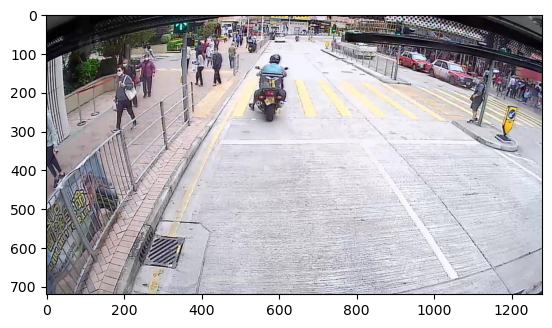

In [174]:
plt.imshow(image_orig)
plt.show()

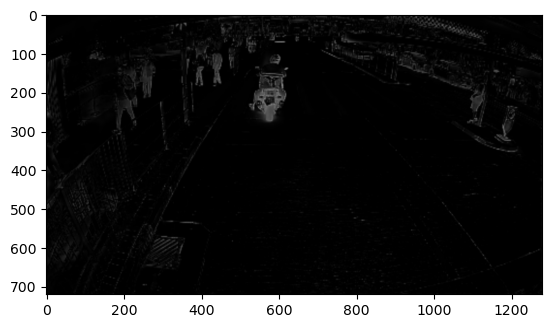

In [175]:
plt.imshow(image_mask, cmap='gray')
plt.show()

In [201]:
for row in range(image_orig.shape[0] - 1):
    for col in range(image_orig.shape[1]):
        mask_intensity = image_mask[row][col][0]
        if mask_intensity > 3:
            intensity = int((image_orig[row][col][0] + image_orig[row][col][1] + image_orig[row][col][2])/3.0)
            greyed_pixel = [intensity, intensity, intensity]
            orig_pixel = image_orig[row][col]
            if mask_intensity > 5:
                image_res[row][col] = greyed_pixel
            else:
                r0 = int(greyed_pixel[0]*(mask_intensity/5) + orig_pixel[0]*(1-mask_intensity/5))
                r1 = int(greyed_pixel[1]*(mask_intensity/5) + orig_pixel[1]*(1-mask_intensity/5))
                r2 = int(greyed_pixel[2]*(mask_intensity/5) + orig_pixel[2]*(1-mask_intensity/5))
                image_res[row][col] = [r0,r1,r2]
        else:
            image_res[row][col] = image_orig[row][col]

C:\Users\cqx20\AppData\Local\Temp\ipykernel_57588\3098132834.py:5: RuntimeWarning: overflow encountered in scalar add
  intensity = int((image_orig[row][col][0] + image_orig[row][col][1] + image_orig[row][col][2])/3.0)


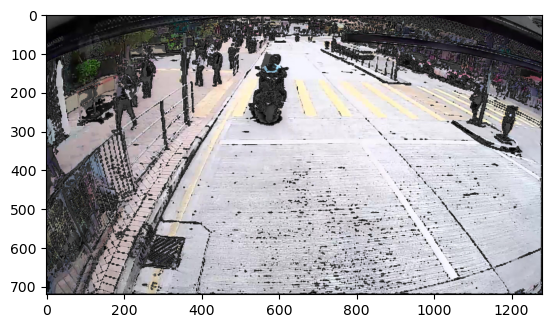

In [202]:
plt.imshow(image_res)
plt.show()

In [216]:
import os

orig_path = r'C:\Users\cqx20\demo1\original'
mask_path = r'C:\Users\cqx20\demo1\MSE'
res_path = r'C:\Users\cqx20\demo1\merged'

if os.path.exists(orig_path) and os.path.exists(mask_path):
    if not os.path.exists(res_path):
        os.mkdir(res_path)
    orig_files = os.listdir(orig_path)
    mask_files = os.listdir(mask_path)
    for i in range(len(orig_files)):
        image_orig = io.imread(os.path.join(orig_path, orig_files[i]))
        image_mask_low_size = io.imread(os.path.join(mask_path, mask_files[i]))

        image_mask = transform.resize(image_mask_low_size, (image_orig.shape[0], image_orig.shape[1], 4), mode = 'symmetric')
        mask_float = img_as_float(image_mask)
        normalized_mask = rescale_intensity(mask_float, in_range='image', out_range=(0, 1))
        image_mask = img_as_ubyte(normalized_mask)


        image_res = np.zeros_like(image_orig)
                                        
        for row in range(image_orig.shape[0] - 1):
            for col in range(image_orig.shape[1]):
                mask_intensity = image_mask[row][col][0]
                if mask_intensity > 0:
                    intensity = int((image_orig[row][col][0] + image_orig[row][col][1] + image_orig[row][col][2])/3.0)
                    greyed_pixel = [intensity, intensity, intensity]
                    orig_pixel = image_orig[row][col]
                    if mask_intensity > 5:
                        image_res[row][col] = greyed_pixel
                    else:
                        r0 = int(greyed_pixel[0]*(mask_intensity/5) + orig_pixel[0]*(1-mask_intensity/5))
                        r1 = int(greyed_pixel[1]*(mask_intensity/5) + orig_pixel[1]*(1-mask_intensity/5))
                        r2 = int(greyed_pixel[2]*(mask_intensity/5) + orig_pixel[2]*(1-mask_intensity/5))
                        image_res[row][col] = [r0,r1,r2]
                else:
                    image_res[row][col] = image_orig[row][col]
        
        io.imsave(os.path.join(res_path,orig_files[i]), image_res)

C:\Users\cqx20\AppData\Local\Temp\ipykernel_57588\2079736940.py:28: RuntimeWarning: overflow encountered in scalar add
  intensity = int((image_orig[row][col][0] + image_orig[row][col][1] + image_orig[row][col][2])/3.0)


ValueError: Could not find a backend to open `C:\Users\cqx20\demo1\original\original.mp4`` with iomode `ri`.
Based on the extension, the following plugins might add capable backends:
  pyav:  pip install imageio[pyav]

In [ ]:
import os

orig_path = r'C:\Users\cqx20\demo1\original'
mask_path = r'C:\Users\cqx20\demo1\MSE'
res_path = r'C:\Users\cqx20\demo1\merged'

if os.path.exists(orig_path) and os.path.exists(mask_path):
    if not os.path.exists(res_path):
        os.mkdir(res_path)
    orig_files = os.listdir(orig_path)
    mask_files = os.listdir(mask_path)
    for i in range(len(orig_files)):
        image_orig = io.imread(os.path.join(orig_path, orig_files[i]))
        image_mask_low_size = io.imread(os.path.join(mask_path, mask_files[i]))

        image_mask = transform.resize(image_mask_low_size, (image_orig.shape[0], image_orig.shape[1], 4), mode = 'symmetric')
        mask_float = img_as_float(image_mask)
        normalized_mask = rescale_intensity(mask_float, in_range='image', out_range=(0, 1))
        image_mask = img_as_ubyte(normalized_mask)


        image_res = np.zeros_like(image_orig)
                                        
        for row in range(image_orig.shape[0] - 1):
            for col in range(image_orig.shape[1]):
                mask_intensity = image_mask[row][col][0]
                if mask_intensity > 0:
                    intensity = int((image_orig[row][col][0] + image_orig[row][col][1] + image_orig[row][col][2])/3.0)
                    greyed_pixel = [intensity, intensity, intensity]
                    orig_pixel = image_orig[row][col]
                    if mask_intensity > 5:
                        image_res[row][col] = greyed_pixel
                    else:
                        r0 = int(greyed_pixel[0]*(mask_intensity/5) + orig_pixel[0]*(1-mask_intensity/5))
                        r1 = int(greyed_pixel[1]*(mask_intensity/5) + orig_pixel[1]*(1-mask_intensity/5))
                        r2 = int(greyed_pixel[2]*(mask_intensity/5) + orig_pixel[2]*(1-mask_intensity/5))
                        image_res[row][col] = [r0,r1,r2]
                else:
                    image_res[row][col] = image_orig[row][col]
        
        io.imsave(os.path.join(res_path,orig_files[i]), image_res)

In [220]:
import os

orig_path = r'C:\Users\cqx20\demo3\my_run\original'
res_path = r'C:\Users\cqx20\demo3\my_run\transposed'

if os.path.exists(orig_path):
    if not os.path.exists(res_path):
        os.mkdir(res_path)
    orig_files = os.listdir(orig_path)
    for i in range(len(orig_files)):
        image_orig = io.imread(os.path.join(orig_path, orig_files[i]))
        
        image_res = transform.rotate(image_orig, angle=-90, resize=True)
        
        io.imsave(os.path.join(res_path,orig_files[i]), image_res)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0